In [1]:
################
# IMPORTS

import requests
from music21 import *

In [2]:
################
# ENVIRONMENT

#
# settings for correct environment paths to MuseScore & Lilypond
# 
# (comment out the parts not needed)
#

env = environment.Environment()
# env['musicxmlPath'] = 'path/to/your/musicXmlApplication'
# env['musescoreDirectPNGPath'] = 'path/to/your/museScore'
# env['lilypondPath'] = path/to/your/lilypond'

# on WIN:
env['musicxmlPath'] = 'C:/Program Files (x86)/MuseScore 2/bin/MuseScore.exe'
env['musescoreDirectPNGPath'] = 'C:/Program Files (x86)/MuseScore 2/bin/MuseScore.exe'
env['lilypondPath'] = 'C:/Program Files (x86)/LilyPond/usr/bin/lilypond.exe'

# on Mac:
#env['musicxmlPath'] = '/Applications/MuseScore 2.app/Contents/MacOS/mscore'
#env['musescoreDirectPNGPath'] = '/Applications/MuseScore 2.app/Contents/MacOS/mscore'
#env['lilypondPath'] = '/Applications/Lilypond.app'

# on Linux:
# env['musicxmlPath'] = '/usr/bin/musescore'
# env['musescoreDirectPNGPath'] = '/usr/bin/musescore'
# env['lilypondPath'] = '/usr/bin/lilypond'


print('Environment settings:')
print('musicXML:  ', env['musicxmlPath'])
print('musescore: ', env['musescoreDirectPNGPath'])
print('lilypond:  ', env['lilypondPath'])

Environment settings:
musicXML:   C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe
musescore:  C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe
lilypond:   C:\Program Files (x86)\LilyPond\usr\bin\lilypond.exe


In [3]:
################
# INIT

# routes to football-data api
apiRoot = 'http://api.football-data.org/v1'
apiWM2018Route = '/competitions/467'
apiFixtures = '/fixtures'
apiTeams = '/teams'

apiUrl_fixtures = apiRoot + apiWM2018Route + apiFixtures
apiUrl_teams = apiRoot + apiWM2018Route + apiTeams

print(apiUrl_fixtures)
print(apiUrl_teams)

http://api.football-data.org/v1/competitions/467/fixtures
http://api.football-data.org/v1/competitions/467/teams


In [4]:
################
# FUNCTIONS


# FUNCTION to check the status of an http request
def checkRequestStatus(request):
    "This function checks the status of an http request and prints further information for failing requests"
    if not request.status_code == 200:
        print(request)
        print(request.status_code)
        print(request.headers)
    return


# FUNCTION to create note object dictionaries per team
def createNoteObjectsPerTeam(teamNoteObject):
    "This function returns a dictionary of 3 music21 note objects"
    teamNoteObject =  {1: note.Note(), 2: note.Note(), 3: note.Note()}
    return teamNoteObject


# FUNCTION to get the shortcode of a team
# teamHref: 'http://api.football-data.org/v1/teams/XXX' with XXX: 3-digit team id
def getTeamCodeFromApi(teamHref):
    "This function returns the shortcode of a team"
    for team in teams:
        if (teamHref == team['_links']['self']['href']):
            return team['code']

        
# FUNCTION go get data about a single match
def getMatchShortData(fixture):
    "This function returns a dictionary with compacted data about a single match, including homeTeamCode, homeResult, awayTeamCode, awayResult, status & matchDay"
    match = {}
    resultObj = {}
    homeTeamHref = fixture['_links']['homeTeam']['href']
    match['homeTeamCode'] = getTeamCodeFromApi(homeTeamHref)
    awayTeamHref = fixture['_links']['awayTeam']['href']
    match['awayTeamCode'] = getTeamCodeFromApi(awayTeamHref)
    match['matchDay'] = fixture['matchday']
    match['status'] = fixture['status']
    if ('penaltyShootout' in fixture['result']):
        resultObj = fixture['result']['penaltyShootout']
        match['addition'] = 'n. E.'
    elif ('extraTime' in fixture['result']):
        resultObj = fixture['result']['extraTime']
        match['addition'] = 'n. V.'
    else:
        resultObj = fixture['result']
    match['homeResult'] = resultObj['goalsHomeTeam']
    match['awayResult'] = resultObj['goalsAwayTeam']  
    
    return match


# FUNCTION to append list items to a stream
def appendListItemToStream(listItem, s):
    "This function iterates over a list and appends the single items to a stream s"
    for item in listItem:
        s.append(item)
    return

In [5]:
################
# HTTP REQUESTS

# HTTP request 1: get teams from football-data api
r1 = requests.get(apiUrl_teams)
checkRequestStatus(r1)

#store results from request
teamsCount = r1.json()['count']
teams = r1.json()['teams']

print('number of teams: ', teamsCount)
print(teams)

number of teams:  32
[{'_links': {'self': {'href': 'http://api.football-data.org/v1/teams/808'}, 'fixtures': {'href': 'http://api.football-data.org/v1/teams/808/fixtures'}, 'players': {'href': 'http://api.football-data.org/v1/teams/808/players'}}, 'name': 'Russia', 'code': 'RUS', 'shortName': None, 'squadMarketValue': None, 'crestUrl': 'https://upload.wikimedia.org/wikipedia/commons/f/f3/Flag_of_Russia.svg'}, {'_links': {'self': {'href': 'http://api.football-data.org/v1/teams/801'}, 'fixtures': {'href': 'http://api.football-data.org/v1/teams/801/fixtures'}, 'players': {'href': 'http://api.football-data.org/v1/teams/801/players'}}, 'name': 'Saudi Arabia', 'code': 'KSA', 'shortName': None, 'squadMarketValue': None, 'crestUrl': 'https://upload.wikimedia.org/wikipedia/commons/0/0d/Flag_of_Saudi_Arabia.svg'}, {'_links': {'self': {'href': 'http://api.football-data.org/v1/teams/825'}, 'fixtures': {'href': 'http://api.football-data.org/v1/teams/825/fixtures'}, 'players': {'href': 'http://api.f

In [6]:
# # HTTP request 2: get fixtures from football-data api
r2 = requests.get(apiUrl_fixtures)
checkRequestStatus(r2)

#store results from request
fixturesCount = r2.json()['count']
fixtures = r2.json()['fixtures']

print('number of fixtures: ', fixturesCount)
print(fixtures)

number of fixtures:  64
[{'_links': {'self': {'href': 'http://api.football-data.org/v1/fixtures/165069'}, 'competition': {'href': 'http://api.football-data.org/v1/competitions/467'}, 'homeTeam': {'href': 'http://api.football-data.org/v1/teams/808'}, 'awayTeam': {'href': 'http://api.football-data.org/v1/teams/801'}}, 'date': '2018-06-14T15:00:00Z', 'status': 'FINISHED', 'matchday': 1, 'homeTeamName': 'Russia', 'awayTeamName': 'Saudi Arabia', 'result': {'goalsHomeTeam': 5, 'goalsAwayTeam': 0, 'halfTime': {'goalsHomeTeam': 2, 'goalsAwayTeam': 0}}, 'odds': None}, {'_links': {'self': {'href': 'http://api.football-data.org/v1/fixtures/165084'}, 'competition': {'href': 'http://api.football-data.org/v1/competitions/467'}, 'homeTeam': {'href': 'http://api.football-data.org/v1/teams/825'}, 'awayTeam': {'href': 'http://api.football-data.org/v1/teams/758'}}, 'date': '2018-06-15T12:00:00Z', 'status': 'FINISHED', 'matchday': 1, 'homeTeamName': 'Egypt', 'awayTeamName': 'Uruguay', 'result': {'goalsHom

In [7]:
# create dictionary of groups and their resp. teams
  
# init variables
groupsWithTeamsDict = {}                                        # empty dictionary to populate with groups and their teams 
groupLabel = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']           # array of group labels (strings)
groupsDict = [                                                  # API returns no group infos, so it has to be added manually   
    {'RUS': {}, 'KSA': {}, 'EGY': {}, 'URU': {}},
    {'MAR': {}, 'IRN': {}, 'ESP': {}, 'POR': {}},
    {'FRA': {}, 'DEN': {}, 'AUS': {}, 'PER': {}},
    {'CRO': {}, 'NGA': {}, 'ISL': {}, 'ARG': {}},
    {'BRA': {}, 'SUI': {}, 'CRC': {}, 'SRB': {}},
    {'GER': {}, 'MEX': {}, 'SWE': {}, 'KOR': {}},
    {'BEL': {}, 'PAN': {}, 'TUN': {}, 'ENG': {}},
    {'COL': {}, 'JPN': {}, 'POL': {}, 'SEN': {}}
]                      


# create dictionary
if (len(groupLabel) == len(groupsDict)):
    for i in range(len(groupLabel)):
        # iterate over teams per group
        for teamCode, teamNoteObject in groupsDict[i].items():
            # create note object for every single team
            groupsDict[i][teamCode] = createNoteObjectsPerTeam(teamNoteObject)  
        # populate groupsWithTeamsDict with groupLabel and the 4 teams for each group
        groupsWithTeamsDict[groupLabel[i]] = groupsDict[i]
        

print(groupsWithTeamsDict)

{'A': {'RUS': {1: <music21.note.Note C>, 2: <music21.note.Note C>, 3: <music21.note.Note C>}, 'KSA': {1: <music21.note.Note C>, 2: <music21.note.Note C>, 3: <music21.note.Note C>}, 'EGY': {1: <music21.note.Note C>, 2: <music21.note.Note C>, 3: <music21.note.Note C>}, 'URU': {1: <music21.note.Note C>, 2: <music21.note.Note C>, 3: <music21.note.Note C>}}, 'B': {'MAR': {1: <music21.note.Note C>, 2: <music21.note.Note C>, 3: <music21.note.Note C>}, 'IRN': {1: <music21.note.Note C>, 2: <music21.note.Note C>, 3: <music21.note.Note C>}, 'ESP': {1: <music21.note.Note C>, 2: <music21.note.Note C>, 3: <music21.note.Note C>}, 'POR': {1: <music21.note.Note C>, 2: <music21.note.Note C>, 3: <music21.note.Note C>}}, 'C': {'FRA': {1: <music21.note.Note C>, 2: <music21.note.Note C>, 3: <music21.note.Note C>}, 'DEN': {1: <music21.note.Note C>, 2: <music21.note.Note C>, 3: <music21.note.Note C>}, 'AUS': {1: <music21.note.Note C>, 2: <music21.note.Note C>, 3: <music21.note.Note C>}, 'PER': {1: <music21.no

In [8]:
# create list of matches and their resp. data

# init
matches = []

# get matchdata for finished matches
for fixture in fixtures:
    # consider only finished matches
    if fixture['status'] == 'FINISHED': 
        # get compact data about match 
        matches.append(getMatchShortData(fixture))

print(matches)

[{'homeTeamCode': 'RUS', 'awayTeamCode': 'KSA', 'matchDay': 1, 'status': 'FINISHED', 'homeResult': 5, 'awayResult': 0}, {'homeTeamCode': 'EGY', 'awayTeamCode': 'URU', 'matchDay': 1, 'status': 'FINISHED', 'homeResult': 0, 'awayResult': 1}, {'homeTeamCode': 'MAR', 'awayTeamCode': 'IRN', 'matchDay': 1, 'status': 'FINISHED', 'homeResult': 0, 'awayResult': 1}, {'homeTeamCode': 'POR', 'awayTeamCode': 'ESP', 'matchDay': 1, 'status': 'FINISHED', 'homeResult': 3, 'awayResult': 3}, {'homeTeamCode': 'FRA', 'awayTeamCode': 'AUS', 'matchDay': 1, 'status': 'FINISHED', 'homeResult': 2, 'awayResult': 1}, {'homeTeamCode': 'ARG', 'awayTeamCode': 'ISL', 'matchDay': 1, 'status': 'FINISHED', 'homeResult': 1, 'awayResult': 1}, {'homeTeamCode': 'PER', 'awayTeamCode': 'DEN', 'matchDay': 1, 'status': 'FINISHED', 'homeResult': 0, 'awayResult': 1}, {'homeTeamCode': 'CRO', 'awayTeamCode': 'NGA', 'matchDay': 1, 'status': 'FINISHED', 'homeResult': 2, 'awayResult': 0}, {'homeTeamCode': 'CRC', 'awayTeamCode': 'SRB', 

In [9]:
# populate match results

# iterate over matches
for match in matches:
    # init shortcuts
    homeCode = match['homeTeamCode']
    awayCode = match['awayTeamCode']
    matchDay = match['matchDay']
    homeResult = match['homeResult']
    awayResult = match['awayResult']

    # add match results as pitchClasses to music21 note objects
    noteLength = 'quarter'
    if (match['matchDay'] > 3):
        noteLength = 'half'
    homeNote = note.Note(type=noteLength)
    awayNote = note.Note(type=noteLength)
    homeNote.pitch.pitchClass = homeResult
    awayNote.pitch.pitchClass = awayResult

    # transform match results to chord objects with result strings as lyrics and add them all to match dictionary
    separator = ': '            
    match['gameChord'] = chord.Chord([homeNote, awayNote])
    match['gameChord'].addLyric(homeCode + separator + str(homeResult))
    match['gameChord'].addLyric(awayCode + separator + str(awayResult))
    if ('addition' in match):
        match['gameChord'].addLyric(match['addition'])
    
    # iterate over groups
    for groupKey, groupValue in groupsWithTeamsDict.items():
        # find teamcodes in groups 
        if homeCode in groupValue:
             # add group label to match dictionary
            match['homeTeamGroup'] = groupKey
        if awayCode in groupValue:
             # add group label to match dictionary
            match['awayTeamGroup'] = groupKey
        
    print('match: ', match)

match:  {'homeTeamCode': 'RUS', 'awayTeamCode': 'KSA', 'matchDay': 1, 'status': 'FINISHED', 'homeResult': 5, 'awayResult': 0, 'gameChord': <music21.chord.Chord F4 C4>, 'homeTeamGroup': 'A', 'awayTeamGroup': 'A'}
match:  {'homeTeamCode': 'EGY', 'awayTeamCode': 'URU', 'matchDay': 1, 'status': 'FINISHED', 'homeResult': 0, 'awayResult': 1, 'gameChord': <music21.chord.Chord C4 C#4>, 'homeTeamGroup': 'A', 'awayTeamGroup': 'A'}
match:  {'homeTeamCode': 'MAR', 'awayTeamCode': 'IRN', 'matchDay': 1, 'status': 'FINISHED', 'homeResult': 0, 'awayResult': 1, 'gameChord': <music21.chord.Chord C4 C#4>, 'homeTeamGroup': 'B', 'awayTeamGroup': 'B'}
match:  {'homeTeamCode': 'POR', 'awayTeamCode': 'ESP', 'matchDay': 1, 'status': 'FINISHED', 'homeResult': 3, 'awayResult': 3, 'gameChord': <music21.chord.Chord E-4 E-4>, 'homeTeamGroup': 'B', 'awayTeamGroup': 'B'}
match:  {'homeTeamCode': 'FRA', 'awayTeamCode': 'AUS', 'matchDay': 1, 'status': 'FINISHED', 'homeResult': 2, 'awayResult': 1, 'gameChord': <music21.

In [10]:
# group matches as chord pairs per matchday

# init
groupChordsByMatchDay = {}

# get matchDays with group matches as chord pairs
for i in range(1, 9):
    # iterate over matchDays 1-8 (group phase + knockout phase)
    matchDayChordPairsList = []

    for label in groupLabel:
        # iterate over group label (A-H)
        matchChordPairList = []
        for match in matches:
            # iterate over matches and check for correct matchday and group
            if match['matchDay'] == i:
                if match['homeTeamGroup'] == label:
                    if 'gameChord' in match:
                        # add existing chords to pair list
                        matchChordPairList.append(match['gameChord'])
        if matchChordPairList:
            # add existing pair lists to matchday
            matchDayChordPairsList.append(matchChordPairList)
    
    # check for two values per group array after quarter finals (matchday > 4)
    if i > 4:
        for pairIndex, pair in enumerate(matchDayChordPairsList):
            # iterate over pair list with index
            if (len(pair) > 1):
                # extract second value from array
                extractedChord = pair.pop()
                # insert extracted value as separate array to pair list
                matchDayChordPairsList.insert(pairIndex+1, [extractedChord])
    
    # populate dictionary with matchdays and their resp. pair lists
    groupChordsByMatchDay[i] = matchDayChordPairsList


print(groupChordsByMatchDay)

{1: [[<music21.chord.Chord F4 C4>, <music21.chord.Chord C4 C#4>], [<music21.chord.Chord C4 C#4>, <music21.chord.Chord E-4 E-4>], [<music21.chord.Chord D4 C#4>, <music21.chord.Chord C4 C#4>], [<music21.chord.Chord C#4 C#4>, <music21.chord.Chord D4 C4>], [<music21.chord.Chord C4 C#4>, <music21.chord.Chord C#4 C#4>], [<music21.chord.Chord C4 C#4>, <music21.chord.Chord C#4 C4>], [<music21.chord.Chord E-4 C4>, <music21.chord.Chord C#4 D4>], [<music21.chord.Chord C#4 D4>, <music21.chord.Chord C#4 D4>]], 2: [[<music21.chord.Chord E-4 C#4>, <music21.chord.Chord C#4 C4>], [<music21.chord.Chord C#4 C4>, <music21.chord.Chord C4 C#4>], [<music21.chord.Chord C#4 C#4>, <music21.chord.Chord C#4 C4>], [<music21.chord.Chord C4 E-4>, <music21.chord.Chord D4 C4>], [<music21.chord.Chord D4 C4>, <music21.chord.Chord C#4 D4>], [<music21.chord.Chord C#4 D4>, <music21.chord.Chord D4 C#4>], [<music21.chord.Chord F4 D4>, <music21.chord.Chord F#4 C#4>], [<music21.chord.Chord D4 D4>, <music21.chord.Chord C4 E-4>]

In [11]:
# add rests for empty game lines
for matchDay, groupChordPairs in groupChordsByMatchDay.items():
    
    restLength = 'half'
    
    if matchDay == 5:
        for i in range(0, 4):
            groupChordPairs.insert(2*i+1, [note.Rest(type=restLength)])
            
    
    if matchDay == 6:
        for i in range(0, 1):
            groupChordPairs.insert(i, [note.Rest(type=restLength)])
            groupChordPairs.append([note.Rest(type=restLength)])
        groupChordPairs.insert(3, [note.Rest(type=restLength)])
        groupChordPairs.append([note.Rest(type=restLength)])
        print(groupChordPairs)
        
    if matchDay == 7:
        for i in range(0, 3):
            groupChordPairs.insert(i, [note.Rest(type=restLength)])
            groupChordPairs.append([note.Rest(type=restLength)])
        groupChordPairs.append([note.Rest(type=restLength)])
        print(groupChordPairs)
    
    if matchDay == 8:
        for i in range(0, 3):
            groupChordPairs.insert(i, [note.Rest(type=restLength)])
            groupChordPairs.append([note.Rest(type=restLength)])
        groupChordPairs.append([note.Rest(type=restLength)])
        print(groupChordPairs)
    
print(groupChordsByMatchDay) 

[[<music21.note.Rest rest>], [<music21.note.Rest rest>], [<music21.chord.Chord C#4 C4>], [<music21.note.Rest rest>], [<music21.chord.Chord D4 C#4>], [<music21.note.Rest rest>], [<music21.note.Rest rest>], [<music21.note.Rest rest>]]
[[<music21.note.Rest rest>], [<music21.note.Rest rest>], [<music21.note.Rest rest>], [<music21.chord.Chord D4 C4>], [<music21.note.Rest rest>], [<music21.note.Rest rest>], [<music21.note.Rest rest>], [<music21.note.Rest rest>]]
[[<music21.note.Rest rest>], [<music21.note.Rest rest>], [<music21.note.Rest rest>], [<music21.chord.Chord E4 D4>], [<music21.note.Rest rest>], [<music21.note.Rest rest>], [<music21.note.Rest rest>], [<music21.note.Rest rest>]]
{1: [[<music21.chord.Chord F4 C4>, <music21.chord.Chord C4 C#4>], [<music21.chord.Chord C4 C#4>, <music21.chord.Chord E-4 E-4>], [<music21.chord.Chord D4 C#4>, <music21.chord.Chord C4 C#4>], [<music21.chord.Chord C#4 C#4>, <music21.chord.Chord D4 C4>], [<music21.chord.Chord C4 C#4>, <music21.chord.Chord C#4 C#

In [74]:
# create final WMScore stream

# init
groupStreamParts = []     # empty list as container for groups as music21 stream.Part objects


# init empty parts (stream.Part) for every group
for i in range(len(groupLabel)):
    groupString = 'Group ' + groupLabel[i]
    groupStreamParts.append(stream.Part(id=groupString))
    groupStreamParts[i].partName = groupString    
    

# populate groupStreamParts with groupChords
# iterate over matchdays
for matchDay, groupChordPairs in groupChordsByMatchDay.items():
    
    # iterate over groupChordPairs of a matchday
    for i in range(len(groupChordPairs)):
        
        # create music21 measure object with matchday as number
        matchDayMeasure = stream.Measure(number=matchDay)
        
        # iterate over every chord of a chordPair and append it to matchday measure
        for k in range(len(groupChordPairs[i])):
            matchDayMeasure.append(groupChordPairs[i][k])
            
        # check for match of i with length of part list
        if i >= len(groupStreamParts):            
            break
        # append matchday measure to resp. part stream
        groupStreamParts[i].append(matchDayMeasure)

            
# create final WMScore stream object (stream.Stream)
WMScore = stream.Stream(id='WMScore')

# append all groups (stream.Parts) to final WMScore (stream.Stream)
appendListItemToStream(groupStreamParts, WMScore)

WMScore.show('text')

{0.0} <music21.stream.Part Group A>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.chord.Chord F4 C4>
        {1.0} <music21.chord.Chord C4 C#4>
    {2.0} <music21.stream.Measure 2 offset=2.0>
        {0.0} <music21.chord.Chord E-4 C#4>
        {1.0} <music21.chord.Chord C#4 C4>
    {4.0} <music21.stream.Measure 3 offset=4.0>
        {0.0} <music21.chord.Chord D4 C#4>
        {1.0} <music21.chord.Chord E-4 C4>
    {6.0} <music21.stream.Measure 4 offset=6.0>
        {0.0} <music21.chord.Chord D4 C#4>
    {8.0} <music21.stream.Measure 5 offset=8.0>
        {0.0} <music21.chord.Chord C4 D4>
    {10.0} <music21.stream.Measure 6 offset=10.0>
        {0.0} <music21.note.Rest rest>
    {12.0} <music21.stream.Measure 7 offset=12.0>
        {0.0} <music21.note.Rest rest>
    {14.0} <music21.stream.Measure 8 offset=14.0>
        {0.0} <music21.note.Rest rest>
{16.0} <music21.stream.Part Group B>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.chord.

In [75]:
################
# METADATA

WMScore.insert(0.0, metadata.Metadata())
WMScore.metadata.title = '#WMScore 2018'
WMScore.metadata.composer = 'transcoded by @musicenfanthen'
WMScore.metadata.date = metadata.DateBetween(['2018/06/14','2018/06/28'])


################
# TEMPO & TIMESIGNATURE

# add tempo at first measure: quarter = 90 (minutes per game)
firstMeasure = groupStreamParts[0].measure(1)
tempoMark = tempo.MetronomeMark(number=90)
firstMeasure.insert(0.0, tempoMark)

# add time signature
ts0 = meter.TimeSignature('2/4')
for WMScorePart in WMScore.getElementsByClass(stream.Part):
    #part.show('text')
    partMeasures = WMScorePart.getElementsByClass(stream.Measure)
    partMeasures[0].insert(0.0, ts0)

WMScore.makeMeasures()

WMScore.show('text')

{0.0} <music21.metadata.Metadata object at 0x0195D650>
{0.0} <music21.stream.Part Group A>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.tempo.MetronomeMark maestoso Quarter=90>
        {0.0} <music21.meter.TimeSignature 2/4>
        {0.0} <music21.chord.Chord F4 C4>
        {1.0} <music21.chord.Chord C4 C#4>
    {2.0} <music21.stream.Measure 2 offset=2.0>
        {0.0} <music21.chord.Chord E-4 C#4>
        {1.0} <music21.chord.Chord C#4 C4>
    {4.0} <music21.stream.Measure 3 offset=4.0>
        {0.0} <music21.chord.Chord D4 C#4>
        {1.0} <music21.chord.Chord E-4 C4>
    {6.0} <music21.stream.Measure 4 offset=6.0>
        {0.0} <music21.chord.Chord D4 C#4>
    {8.0} <music21.stream.Measure 5 offset=8.0>
        {0.0} <music21.chord.Chord C4 D4>
    {10.0} <music21.stream.Measure 6 offset=10.0>
        {0.0} <music21.note.Rest rest>
    {12.0} <music21.stream.Measure 7 offset=12.0>
        {0.0} <music21.note.Rest rest>
    {14.0} <music21.stream.Measure 8

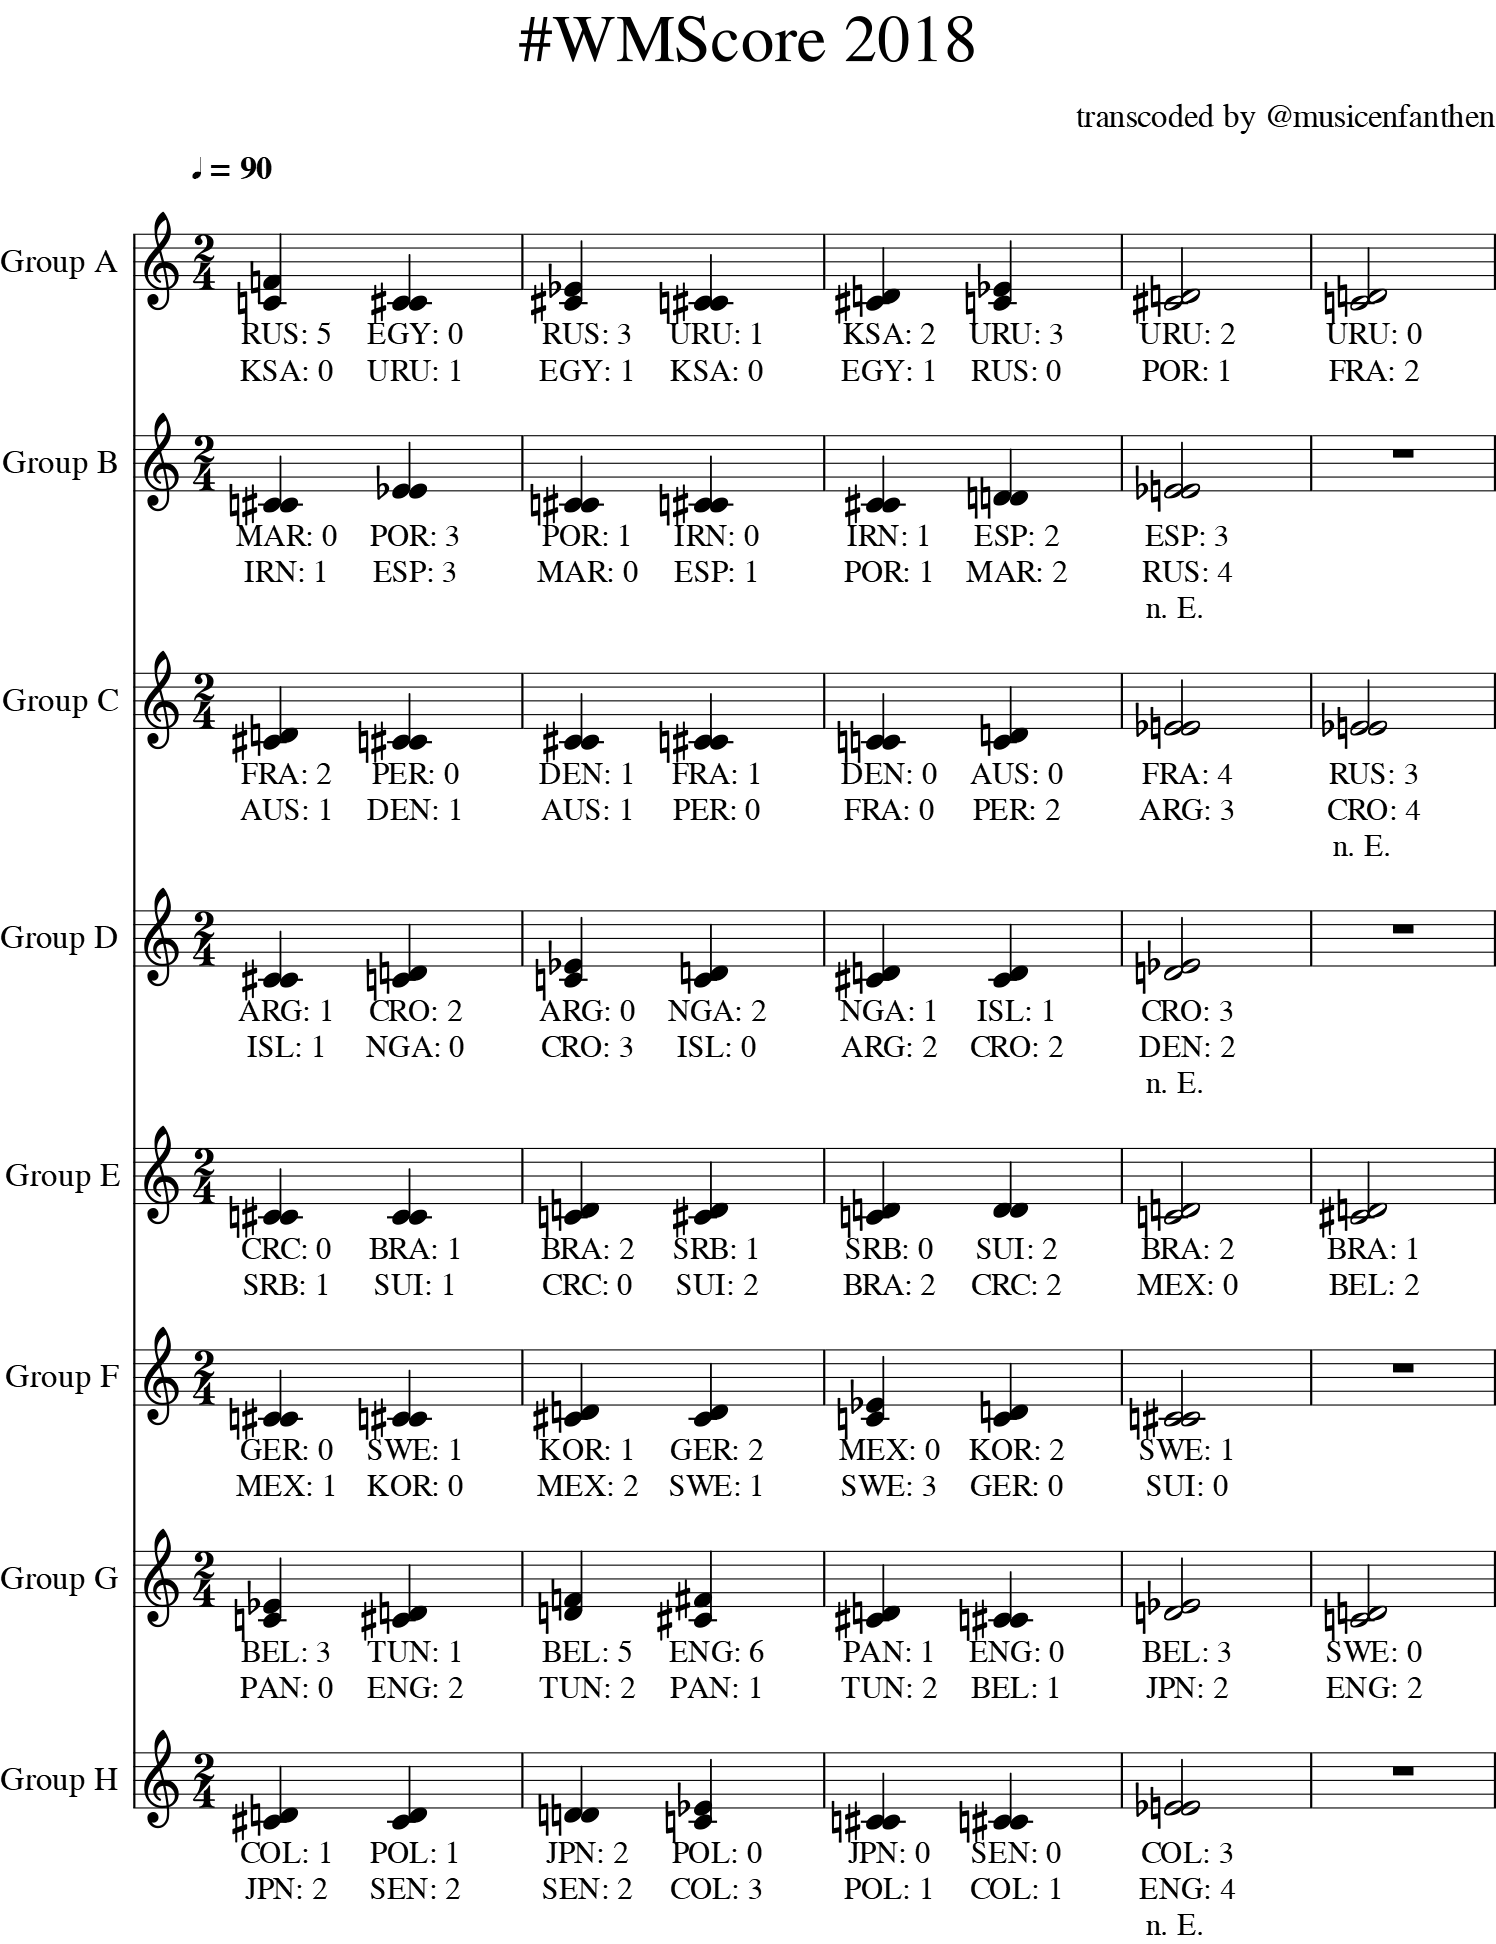

In [76]:
WMScore.show()

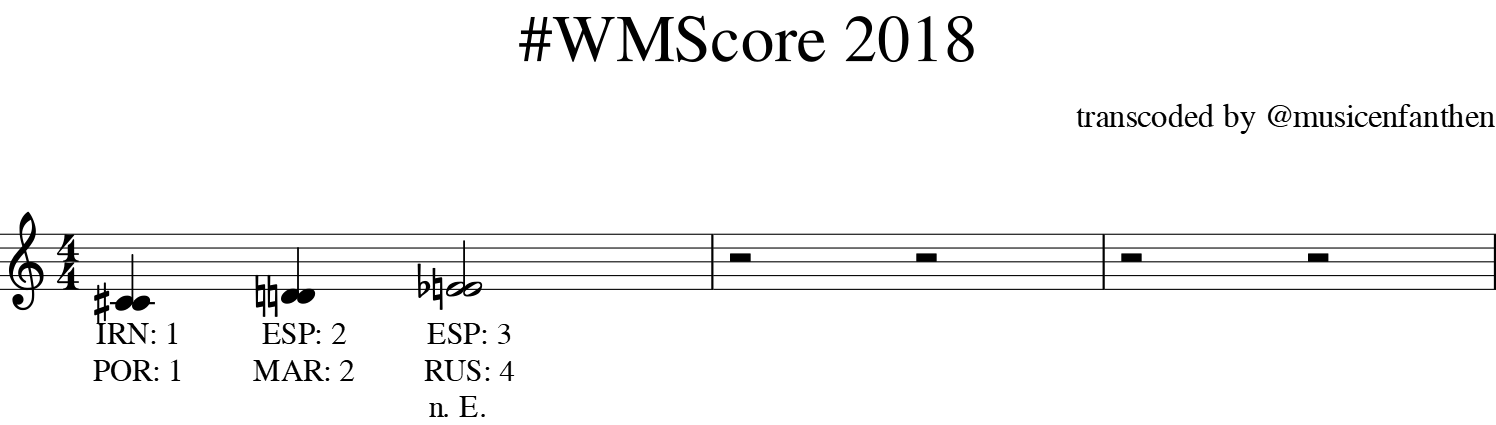

In [77]:
l1 = WMScore.measures(6,8)
l1.show()

In [24]:
for match in matches:
    if match['matchDay'] > 3:
        print(match)

{'homeTeamCode': 'FRA', 'awayTeamCode': 'ARG', 'matchDay': 4, 'status': 'FINISHED', 'homeResult': 4, 'awayResult': 3}
{'homeTeamCode': 'URU', 'awayTeamCode': 'POR', 'matchDay': 4, 'status': 'FINISHED', 'homeResult': 2, 'awayResult': 1}
{'homeTeamCode': 'ESP', 'awayTeamCode': 'RUS', 'matchDay': 4, 'status': 'FINISHED', 'addition': 'n. E.', 'homeResult': 3, 'awayResult': 4}
{'homeTeamCode': 'CRO', 'awayTeamCode': 'DEN', 'matchDay': 4, 'status': 'FINISHED', 'addition': 'n. E.', 'homeResult': 3, 'awayResult': 2}
{'homeTeamCode': 'BRA', 'awayTeamCode': 'MEX', 'matchDay': 4, 'status': 'FINISHED', 'homeResult': 2, 'awayResult': 0}
{'homeTeamCode': 'BEL', 'awayTeamCode': 'JPN', 'matchDay': 4, 'status': 'FINISHED', 'homeResult': 3, 'awayResult': 2}
{'homeTeamCode': 'SWE', 'awayTeamCode': 'SUI', 'matchDay': 4, 'status': 'FINISHED', 'homeResult': 1, 'awayResult': 0}
{'homeTeamCode': 'COL', 'awayTeamCode': 'ENG', 'matchDay': 4, 'status': 'FINISHED', 'addition': 'n. E.', 'homeResult': 3, 'awayResul

In [38]:
# iterate over matches
for match in matches:
    if match['matchDay'] > 3:
        # iterate over groups        
        # init shortcuts
        homeCode = match['homeTeamCode']
        awayCode = match['awayTeamCode']
        matchDay = match['matchDay']
        homeResult = match['homeResult']
        awayResult = match['awayResult']

        # add match results as pitchClasses to music21 note objects in groups dictionary
        homeNote = note.Note()
        awayNote = note.Note()
        homeNote.pitch.pitchClass = homeResult
        awayNote.pitch.pitchClass = awayResult

        # add group label to match dictionary
        match['group'] = groupKey

        # transform match results to chord objects with result strings as lyrics and add them all to match dictionary
        separator = ': '            
        match['gameChord'] = chord.Chord([homeNote, awayNote])
        match['gameChord'].addLyric(homeCode + separator + str(homeResult))
        match['gameChord'].addLyric(awayCode + separator + str(awayResult))
        if ('addition' in match):
            match['gameChord'].addLyric(match['addition'])
        print(match)

{'homeTeamCode': 'FRA', 'awayTeamCode': 'ARG', 'matchDay': 4, 'status': 'FINISHED', 'homeResult': 4, 'awayResult': 3, 'group': 'D', 'gameChord': <music21.chord.Chord E4 E-4>}
{'homeTeamCode': 'URU', 'awayTeamCode': 'POR', 'matchDay': 4, 'status': 'FINISHED', 'homeResult': 2, 'awayResult': 1, 'group': 'D', 'gameChord': <music21.chord.Chord D4 C#4>}
{'homeTeamCode': 'ESP', 'awayTeamCode': 'RUS', 'matchDay': 4, 'status': 'FINISHED', 'addition': 'n. E.', 'homeResult': 3, 'awayResult': 4, 'group': 'D', 'gameChord': <music21.chord.Chord E-4 E4>}
{'homeTeamCode': 'CRO', 'awayTeamCode': 'DEN', 'matchDay': 4, 'status': 'FINISHED', 'addition': 'n. E.', 'homeResult': 3, 'awayResult': 2, 'group': 'D', 'gameChord': <music21.chord.Chord E-4 D4>}
{'homeTeamCode': 'BRA', 'awayTeamCode': 'MEX', 'matchDay': 4, 'status': 'FINISHED', 'homeResult': 2, 'awayResult': 0, 'group': 'D', 'gameChord': <music21.chord.Chord D4 C4>}
{'homeTeamCode': 'BEL', 'awayTeamCode': 'JPN', 'matchDay': 4, 'status': 'FINISHED', 

In [99]:
# group matches as chord pairs per matchday

# init
groupChordsByMatchDay = {}

# get matchDays with group matches as chord pairs
for i in range(4, 9):
    # iterate over matchDays (4-8)
    matchDayChordPairsList = []

    matchChordPairList = []
    for match in matches:
        # iterate over matches and check for correct matchday and group
        if match['matchDay'] == i:                       
            if 'gameChord' in match:
                # add existing chords to pair list
                matchChordPairList.append(match['gameChord'])
    if matchChordPairList:
        # add existing pair lists to matchday
        matchDayChordPairsList.append(matchChordPairList)
    # populate dictionary with matchdays and their resp. pair lists
    groupChordsByMatchDay[i] = matchDayChordPairsList
    
print(groupChordsByMatchDay)

{4: [[<music21.chord.Chord E4 E-4>, <music21.chord.Chord D4 C#4>, <music21.chord.Chord E-4 E4>, <music21.chord.Chord E-4 D4>, <music21.chord.Chord D4 C4>, <music21.chord.Chord E-4 D4>, <music21.chord.Chord C#4 C4>, <music21.chord.Chord E-4 E4>]], 5: [[<music21.chord.Chord C4 D4>, <music21.chord.Chord C#4 D4>, <music21.chord.Chord C4 D4>, <music21.chord.Chord E-4 E4>]], 6: [[<music21.chord.Chord C#4 C4>, <music21.chord.Chord D4 C#4>]], 7: [[<music21.chord.Chord D4 C4>]], 8: [[<music21.chord.Chord E4 D4>]]}


In [100]:
for matchDay, groupChordPairs in groupChordsByMatchDay.items():
    
    # add rests for empty game lines
    if matchDay == 5:
        for i in range(0, 4):
            if (2*i+1 < len(groupChordPairs[0])):
                groupChordPairs[0].insert(2*i+1, note.Rest(type='quarter'))
            else:
                groupChordPairs[0].append(note.Rest(type='quarter'))
    
    if matchDay == 6:
        for i in range(0, 2):
            groupChordPairs[0].insert(i, note.Rest(type='quarter'))
            groupChordPairs[0].append(note.Rest(type='quarter'))
        groupChordPairs[0].insert(3, note.Rest(type='quarter'))
        groupChordPairs[0].append(note.Rest(type='quarter'))
        
    if matchDay == 7:
        for i in range(0, 3):
            groupChordPairs[0].insert(i, note.Rest(type='quarter'))
            groupChordPairs[0].append(note.Rest(type='quarter'))
        groupChordPairs[0].append(note.Rest(type='quarter'))
    
    if matchDay == 8:
        for i in range(0, 3):
            groupChordPairs[0].insert(i, note.Rest(type='quarter'))
            groupChordPairs[0].append(note.Rest(type='quarter'))
        groupChordPairs[0].append(note.Rest(type='quarter'))
    
    print(matchDay, groupChordPairs)    

4 [[<music21.chord.Chord E4 E-4>, <music21.chord.Chord D4 C#4>, <music21.chord.Chord E-4 E4>, <music21.chord.Chord E-4 D4>, <music21.chord.Chord D4 C4>, <music21.chord.Chord E-4 D4>, <music21.chord.Chord C#4 C4>, <music21.chord.Chord E-4 E4>]]
5 [[<music21.chord.Chord C4 D4>, <music21.note.Rest rest>, <music21.chord.Chord C#4 D4>, <music21.note.Rest rest>, <music21.chord.Chord C4 D4>, <music21.note.Rest rest>, <music21.chord.Chord E-4 E4>, <music21.note.Rest rest>]]
6 [[<music21.note.Rest rest>, <music21.note.Rest rest>, <music21.chord.Chord C#4 C4>, <music21.note.Rest rest>, <music21.chord.Chord D4 C#4>, <music21.note.Rest rest>, <music21.note.Rest rest>, <music21.note.Rest rest>]]
7 [[<music21.note.Rest rest>, <music21.note.Rest rest>, <music21.note.Rest rest>, <music21.chord.Chord D4 C4>, <music21.note.Rest rest>, <music21.note.Rest rest>, <music21.note.Rest rest>, <music21.note.Rest rest>]]
8 [[<music21.note.Rest rest>, <music21.note.Rest rest>, <music21.note.Rest rest>, <music21.c

<music21.stream.Measure 4 offset=0.0>


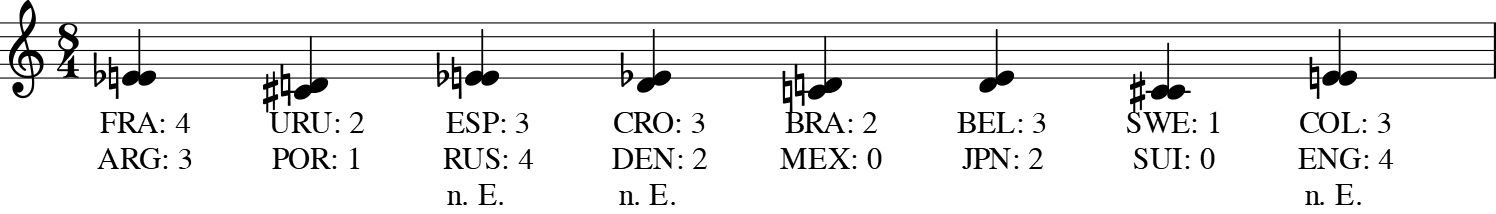

<music21.stream.Measure 5 offset=0.0>


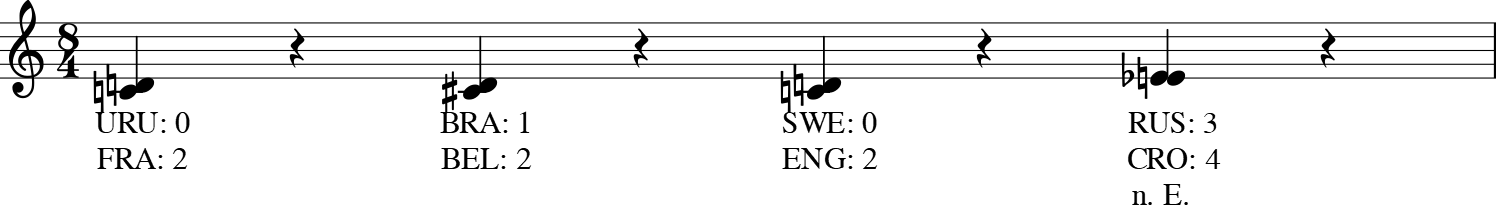

<music21.stream.Measure 6 offset=0.0>


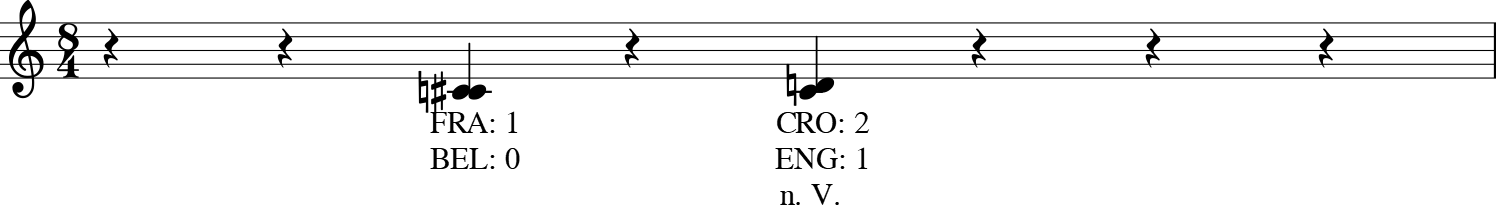

<music21.stream.Measure 7 offset=0.0>


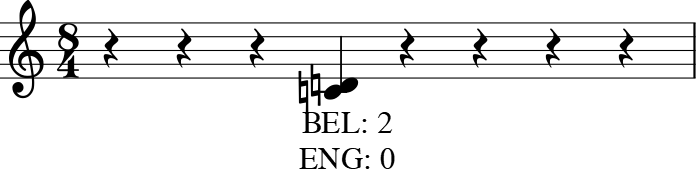

<music21.stream.Measure 8 offset=0.0>


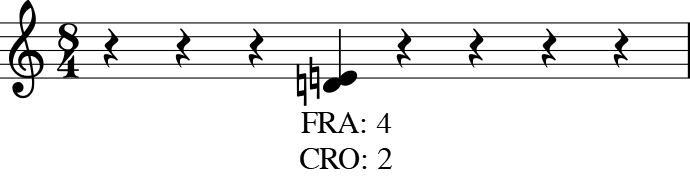

{0.0} <music21.note.Rest rest>
{1.0} <music21.note.Rest rest>
{2.0} <music21.note.Rest rest>
{3.0} <music21.chord.Chord E4 D4>
{4.0} <music21.note.Rest rest>
{5.0} <music21.note.Rest rest>
{6.0} <music21.note.Rest rest>
{7.0} <music21.note.Rest rest>


In [101]:
# init
groupStreamParts = []     # empty list as container for groups as music21 stream.Part objects
matchDayMeasure

# init empty parts (stream.Part) for every group
# for i in range(len(groupLabel)):
#    groupString = 'Group ' + groupLabel[i]
#    groupStreamParts.append(stream.Part(id=groupString))
#    groupStreamParts[i].partName = groupString    
    

# populate groupStreamParts with groupChords
# iterate over matchdays
for matchDay, groupChordPairs in groupChordsByMatchDay.items():
    
    # iterate over groupChordPairs of a matchday
    for i in range(len(groupChordPairs)):
        
        # create music21 measure object with matchday as number
        matchDayMeasure = stream.Measure(number=matchDay)
        
         # iterate over every chord of a chordPair and append it to matchday measure
        for k in range(len(groupChordPairs[i])):
            matchDayMeasure.append(groupChordPairs[i][k])
        
        print(matchDayMeasure)
        matchDayMeasure.show()
        # check for match of i with length of part list
        # if i >= len(groupStreamParts):            
        #    break
        # append matchday measure to resp. part stream
        # groupStreamParts[i].append(matchDayMeasure)        

            
# create final WMScore stream object (stream.Stream)
# WMScore = stream.Stream(id='WMScore')

# append all groups (stream.Parts) to final WMScore (stream.Stream)
# appendListItemToStream(groupStreamParts, WMScore)

matchDayMeasure.show('text')

In [242]:

WMScore.show('text')

{0.0} <music21.metadata.Metadata object at 0x01935950>
{0.0} <music21.stream.Part Group A>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.tempo.MetronomeMark maestoso Quarter=90>
        {0.0} <music21.chord.Chord F4 C4>
        {1.0} <music21.chord.Chord C4 C#4>
    {2.0} <music21.stream.Measure 2 offset=2.0>
        {0.0} <music21.chord.Chord E-4 C#4>
        {1.0} <music21.chord.Chord C#4 C4>
    {4.0} <music21.stream.Measure 3 offset=4.0>
        {0.0} <music21.chord.Chord D4 C#4>
        {1.0} <music21.chord.Chord E-4 C4>
    {6.0} <music21.stream.Measure 4 offset=6.0>
        {0.0} <music21.chord.Chord D4 C#4>
    {8.0} <music21.stream.Measure 5 offset=8.0>
        {0.0} <music21.chord.Chord C4 D4>
    {10.0} <music21.stream.Measure 6 offset=10.0>
        {0.0} <music21.note.Rest rest>
    {12.0} <music21.stream.Measure 7 offset=12.0>
        {0.0} <music21.note.Rest rest>
    {14.0} <music21.stream.Measure 8 offset=14.0>
        {0.0} <music21.note.Rest r